<a href="https://colab.research.google.com/github/ntu254/ntu254-mas291/blob/master/MAS-ass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import và ký hiệu lại tên thư viện
import numpy as np # dùng tính toán thống kê
import pandas as pd # dùng tính toán thống kê
import statsmodels.api as sm # dùng chạy mô hình thống kê
import matplotlib.pyplot as plt # vẽ đồ thị


In [ ]:
# FROM UPLOADED DATA TO FOLDER
df0 = pd.read_excel("/content/Lab_Data.xlsx")
# Read file Excel từ folder đã upload lên folder bên trái
# Cần phải upload file lên mỗi lần chạy (click vào hình folder bên trái)

Part 1: Defining and Collecting Data
1. How was this data collected? Is the sample representative of the population?


In [ ]:
# Check for missing values in the entire DataFrame
missing_values = df0.isnull().sum()

# Display columns with missing values and their counts
print(missing_values[missing_values > 0])

# To find the location of missing values:
missing_values_location = df0[df0.isnull().any(axis=1)]
print(missing_values_location)

fatheduc    690
motheduc    353
KWW          47
IQ          949
married       7
libcrd14     13
dtype: int64
        id  nearc2  nearc4  educ  age  fatheduc  motheduc  weight  momdad14  \
0        2       0       0     7   29       NaN       NaN  158413         1   
14      16       1       1    16   31       NaN       8.0  648053         0   
15      17       1       1    14   24      15.0      12.0  357519         1   
17      20       1       1    14   29       NaN      12.0  496635         0   
20      26       1       1    18   32      12.0      13.0  367470         1   
...    ...     ...     ...   ...  ...       ...       ...     ...       ...   
3005  5218       0       1    12   25       8.0      12.0   82135         1   
3006  5219       0       1    13   34       NaN       NaN   88765         1   
3007  5220       0       1    12   24      11.0       NaN   89271         0   
3008  5221       0       1    12   31       NaN       NaN  110376         1   
3009  5225       0    

2. Is the data Missing Values of the data? How do you find them? How do you deal with them?


In [ ]:
# Drop rows with any missing values
df0_cleaned = df0.dropna()
# Drop columns with any missing values
df0_cleaned = df0.dropna(axis=1)

Part 2: Organizing and Visualizing Variables
3. Classify each of the following variables: nearc4, educ, age, black, wage, IQ, married, exper, lwage and expersq.



In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df0'
# List of variables
variables = ['nearc4', 'educ', 'age', 'black', 'wage', 'IQ', 'married', 'exper', 'lwage', 'expersq']

# Classify variables based on their data type and meaning
classification = {
    'nearc4': 'Categorical (Nominal)',  # Lived near 4yr college (yes/no)
    'educ': 'Numerical (Discrete)',  # Years of education
    'age': 'Numerical (Discrete)',  # Age in years
    'black': 'Categorical (Nominal)',  # Black (yes/no)
    'wage': 'Numerical (Continuous)',  # Hourly wage
    'IQ': 'Numerical (Continuous)',  # IQ score
    'married': 'Categorical (Nominal)',  # Married (yes/no)
    'exper': 'Numerical (Continuous)',  # Years of work experience
    'lwage': 'Numerical (Continuous)',  # Log of hourly wage
    'expersq': 'Numerical (Continuous)'  # Experience squared
}

# Print the classification
for var in variables:
    print(f"{var}: {classification[var]}")

nearc4: Categorical (Nominal)
educ: Numerical (Discrete)
age: Numerical (Discrete)
black: Categorical (Nominal)
wage: Numerical (Continuous)
IQ: Numerical (Continuous)
married: Categorical (Nominal)
exper: Numerical (Continuous)
lwage: Numerical (Continuous)
expersq: Numerical (Continuous)


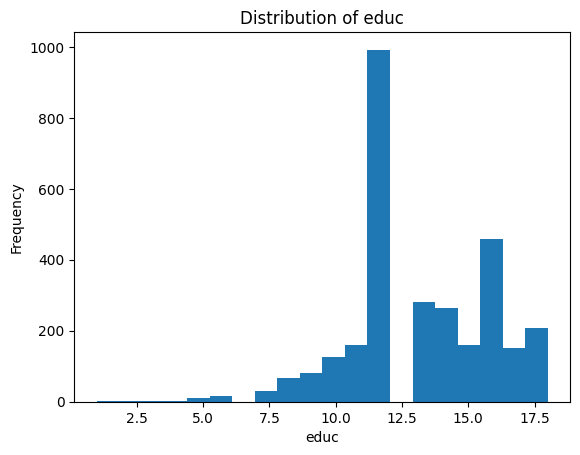

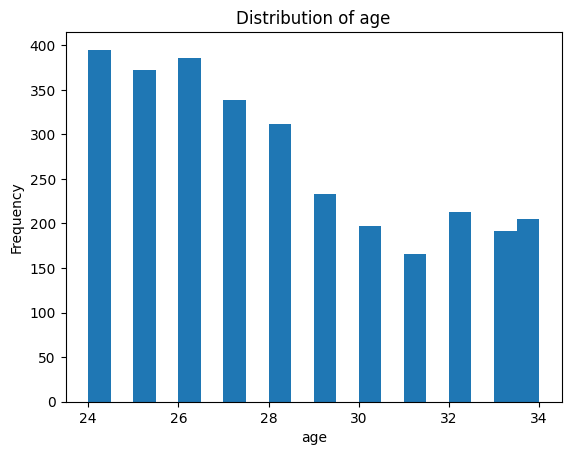

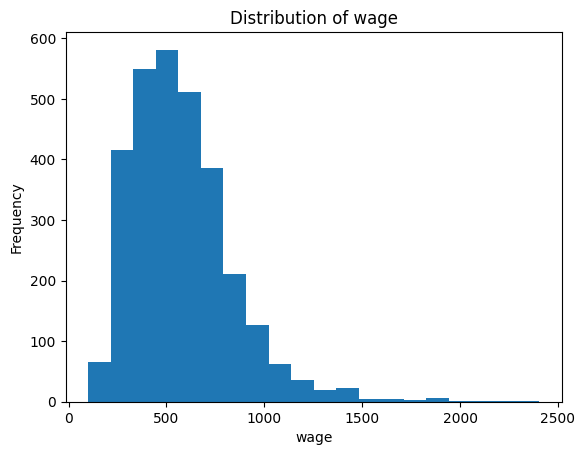

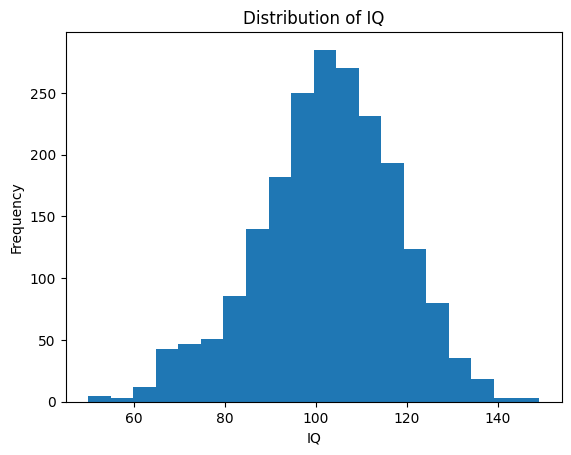

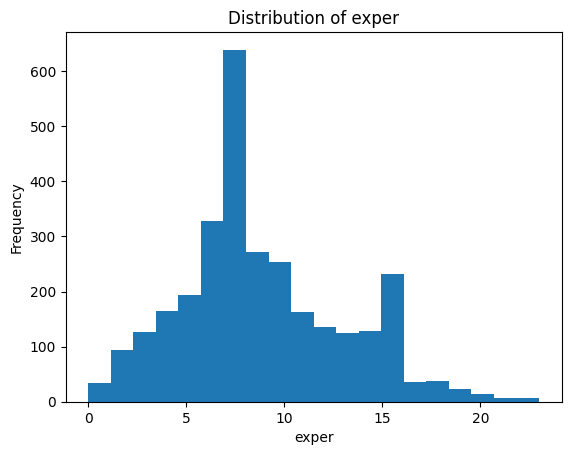

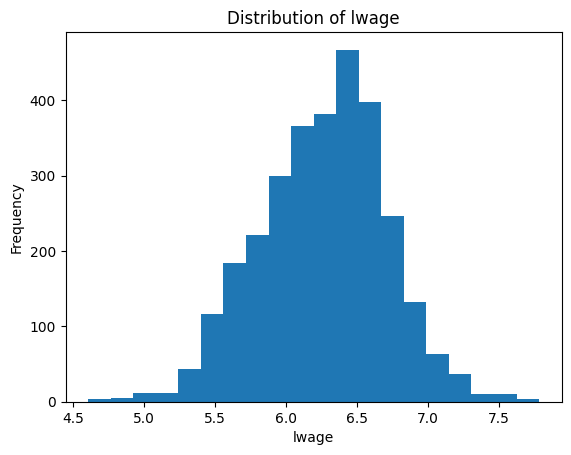

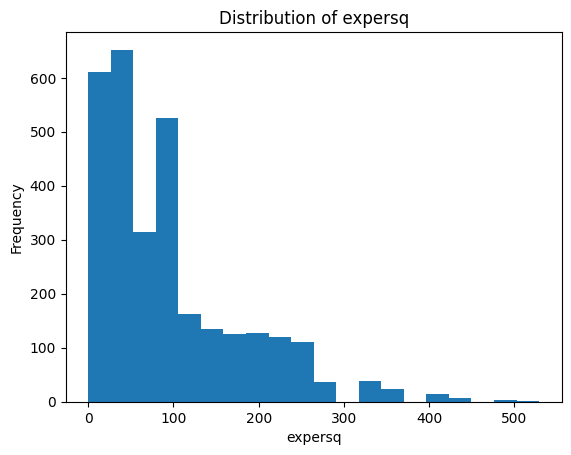

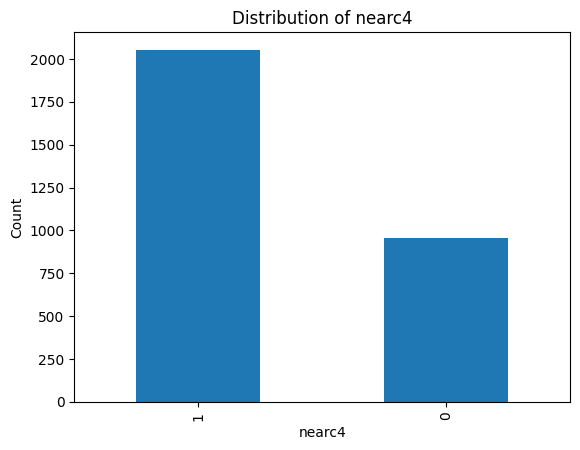

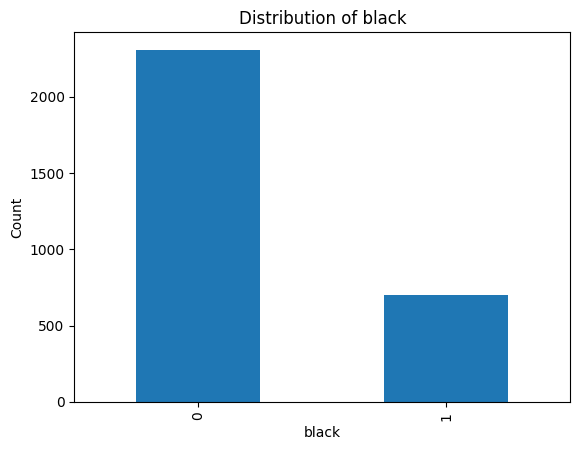

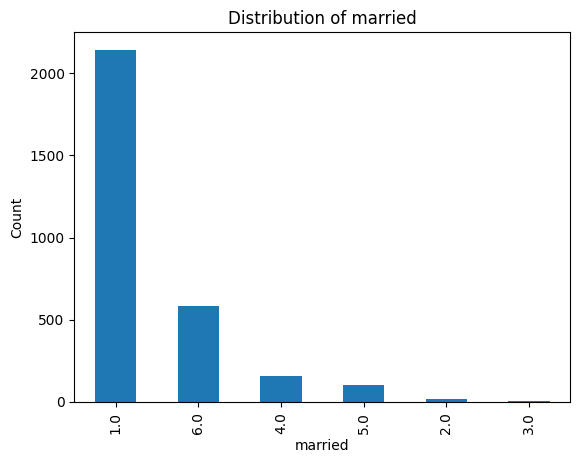

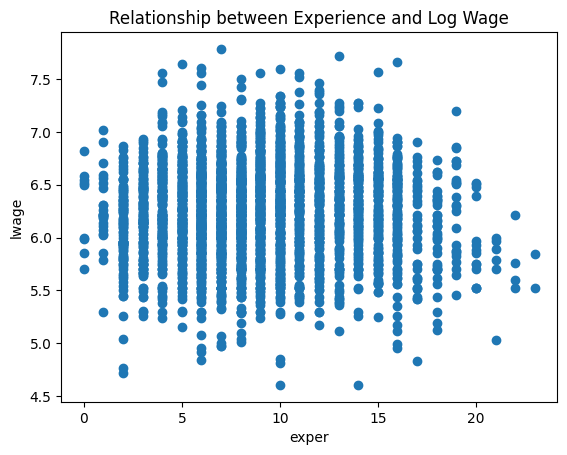

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns  # Optional for enhanced visualizations

# Assuming your DataFrame is named 'df0'

# Histograms for numerical variables
for col in ['educ', 'age', 'wage', 'IQ', 'exper', 'lwage', 'expersq']:
  plt.figure()
  plt.hist(df0[col], bins=20)  # Adjust bins as needed
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

# Bar plots for categorical variables
for col in ['nearc4', 'black', 'married']:
  plt.figure()
  df0[col].value_counts().plot(kind='bar')
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.show()

# Optional: Scatter plot for relationships
plt.figure()
plt.scatter(df0['exper'], df0['lwage'])
plt.title('Relationship between Experience and Log Wage')
plt.xlabel('exper')
plt.ylabel('lwage')
plt.show()

Part 3: Numerical Description Measures
5. Use your subsample to calculate the statistics for wage, IQ, educ and exper.



In [ ]:
# Assuming your DataFrame is named 'df0'

# Select the columns of interest
selected_cols = ['wage', 'IQ', 'educ', 'exper']

# Calculate descriptive statistics
statistics = df0[selected_cols].describe()

# Display the statistics
print(statistics)

              wage           IQ         educ        exper
count  3010.000000  2061.000000  3010.000000  3010.000000
mean    577.282392   102.449782    13.263455     8.856146
std     262.958302    15.423756     2.676913     4.141672
min     100.000000    50.000000     1.000000     0.000000
25%     394.250000    93.000000    12.000000     6.000000
50%     537.500000   103.000000    13.000000     8.000000
75%     708.750000   113.000000    16.000000    11.000000
max    2404.000000   149.000000    18.000000    23.000000


6. Use your subsample to calculate the covariance and the coefficient of correlation between wage and IQ. Repeat for wage and educ, wage and exper.

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df0'

# Calculate and print covariance and correlation for all pairs
variable_pairs = [('wage', 'IQ'), ('wage', 'educ'), ('wage', 'exper')]

for var1, var2 in variable_pairs:
    covariance = df0[var1].cov(df0[var2])
    correlation = df0[var1].corr(df0[var2])

    print(f"Covariance between {var1} and {var2}: {covariance}")
    print(f"Correlation between {var1} and {var2}: {correlation}")
    print("-" * 20)  # Separator for clarity

Covariance between wage and IQ: 781.5040106838512
Correlation between wage and IQ: 0.19201153077296834
--------------------
Covariance between wage and educ: 212.50683387268975
Correlation between wage and educ: 0.3018921220717127
--------------------
Covariance between wage and exper: 32.71062670239562
Correlation between wage and exper: 0.03003490897950387
--------------------
